# DS 2500: Data Wrangling<br>Module Assignment 2
February 15, 2022

Student: Alexander Shahramanyan<br>
Instructor: Professor Marina Kogan

## Introduction

As for me, analysing human preferences, personality traits, habits, opinions, and demographics, and finding relationships between them is very interesting. In this analysis, I'll try to find some correlation between those variables by answering the questions below.

## Questions:
1. Do men and women have different phobias and who fears more?
2. Is there a significant difference in the hobbies and interests of right-handed and left-handed people?
3. Are men or women more concerned about their health (alcohol consumption, smoking, healthy eating)?
4. Do more men or women get higher education?
5. Do more people from villages (who spent most of their childhood in a village) or cities have siblings (or are the only child)?

## Dataset Description:
**Dataset**: contains information on college student music and movie preferences, hobbies and interests, phobias, health habits, personality traits, views on life, and opinions, spending habits, and demographics.
<br>

*Columns*:<br>
150 columns (139 integer and 11 categorical)
- Music preferences (19 items)
- Movie preferences (12 items)
- Hobbies & interests (32 items)
- Phobias (10 items)
- Health habits (3 items)
- Personality traits, views on life, & opinions (57 items)
- Spending habits (7 items)
- Demographics (10 items)

*Number of entries (rows)*: 1010 <br><hr>

All participants were of Slovakian nationality, aged between 15-30. They rated from 1 to 5, 1 being the lowest and 5 being the highest. A more detailed description can be found [here](https://www.kaggle.com/miroslavsabo/young-people-survey).<hr>

*Since the dataset does not contain a large number of entries and the data has been collected from only one country (a university to be more specific), the conclusions of the analysis may not be relevan to the whole human population. However, I believe there some good insights still can be collected from this data.*

## Setup

First, I import all the libraries I will need throughout the notebook, and set the plotting parameters for better visualizations.

In [1]:
# Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import stats

import textwrap

# Plotting settings
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (16, 6)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 18
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['font.family'] = 'serif'

Then I need to load the dataset.

In [2]:
# Load the datasets
df = pd.read_csv("https://raw.githubusercontent.com/alexshah1/DS2500/main/Module%20Assignment%202/responses.csv?token=GHSAT0AAAAAABRNYT6X7CAS2HUYQTIGOMHWYQEWXHQ")

Next step is checking the dataset.

### Dataset Check

In [3]:
# Check dataset shape
df.shape

(1010, 150)

In [4]:
# Check the top of the data
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [5]:
# Check the bottom of the data
df.tail()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats
1009,5.0,5.0,4.0,3.0,2.0,3.0,3.0,4.0,1.0,1.0,...,21.0,185.0,72.0,1.0,male,right handed,secondary school,no,village,house/bungalow


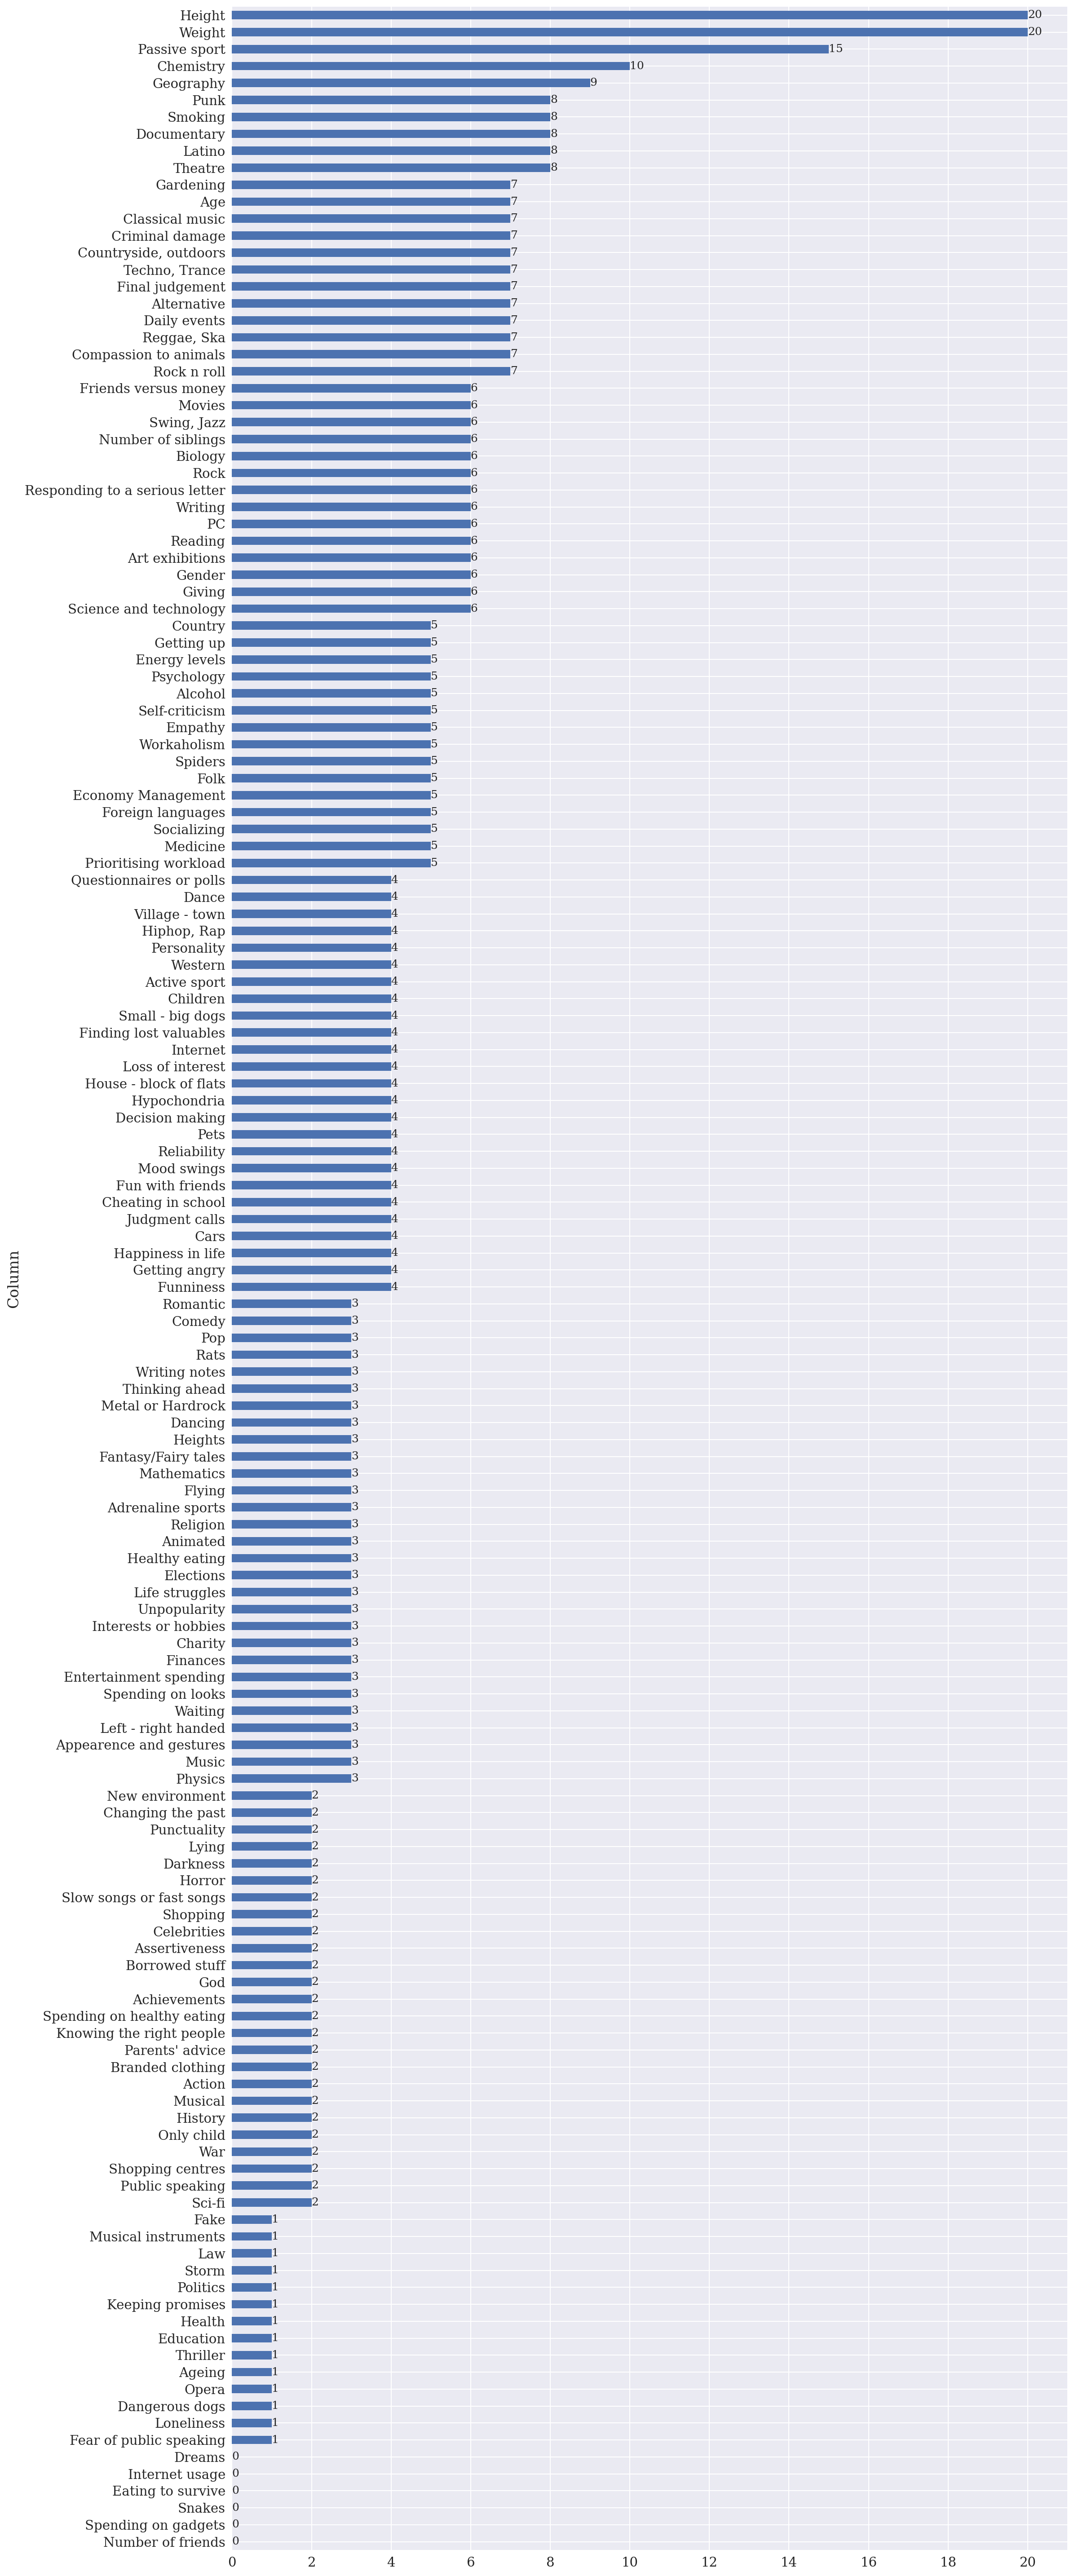

In [6]:
# Count null values
missing_values = df.isnull().sum().sort_values(ascending=False).sort_values()

# Make a plot
ax = missing_values.plot(kind="barh", figsize=(16, 50), xticks=range(0, 21, 2), xlabel="Column", ylabel="# of missing values")

# Add data labels
for (idx, val) in zip(ax.get_yticks(), missing_values.values):
    plt.text(val, idx, val, fontsize=12, ha="left", va="center")

# Show the plot
plt.show()

In [56]:
# Data description
df.describe(include='all')
# Because of the huge size of the dataset describe does not help much

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,...,1003.000000,990.000000,990.000000,1004.000000,1004,1007,1009,1008,1006,1006
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,2,6,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,female,right handed,secondary school,no,city,block of flats
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,593,906,621,754,707,595
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,...,20.433699,173.514141,66.405051,1.297809,NaN,NaN,NaN,NaN,NaN,NaN
std,0.664049,0.833931,1.170568,1.138916,1.076136,1.252570,1.260845,1.161400,1.184861,1.372995,...,2.828840,10.024505,13.839561,1.013348,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,15.000000,62.000000,41.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,19.000000,167.000000,55.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,20.000000,173.000000,64.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,22.000000,180.000000,75.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN


## Q1: Who Fears More?

First, I'll try to answer the first question, which is about the differences in fears between males and females. Based on my experience, I believe women will fear slightly more than men in some of the categories. However, I also think, there can be some fears, that has no difference between the genders. To gain an understanding about which gender fears more, and if there are certain phobias that are more widespread than others, I first need to get all the columns related to phobias.

In [120]:
# Get the column names that represent fears
fears = df.loc[:, "Flying":"Fear of public speaking"].columns.tolist()
fears

['Flying',
 'Storm',
 'Darkness',
 'Heights',
 'Spiders',
 'Snakes',
 'Rats',
 'Ageing',
 'Dangerous dogs',
 'Fear of public speaking']

As we can see, there are a total of 10 various fears in the dataset. I create a new dataframe by melting the original one, to have `Gender` - `Fear` - `Rating`, the variables I will need for visualization.

In [66]:
# Make a new df with gender, fear type, and rating
gender_fears = df.melt(id_vars ="Gender", value_vars=fears, var_name="Fear", value_name="Rating")

In [67]:
# Check the head of the dataframe
gender_fears.head()

,Gender,Fear,Rating
0,female,Flying,1.0
1,female,Flying,1.0
2,female,Flying,1.0
3,female,Flying,2.0
4,female,Flying,1.0


In [68]:
# Check the tail of the dataframe
gender_fears.tail()

,Gender,Fear,Rating
10095,female,Fear of public speaking,4.0
10096,male,Fear of public speaking,5.0
10097,female,Fear of public speaking,5.0
10098,female,Fear of public speaking,5.0
10099,male,Fear of public speaking,2.0


In [69]:
# Count null values
gender_fears.isnull().sum()

Gender    60
Fear       0
Rating    20
dtype: int64

The dataframe seems to look fine. However, there are some null values in `Gender` and `Rating`. I will just drop them, because there is no good way of filling them in.

In [70]:
# Drop null values from
gender_fears.dropna(inplace=True)

Now, I will just plot a bar chart of the 'average fear rating' for each gender for each of the variables.

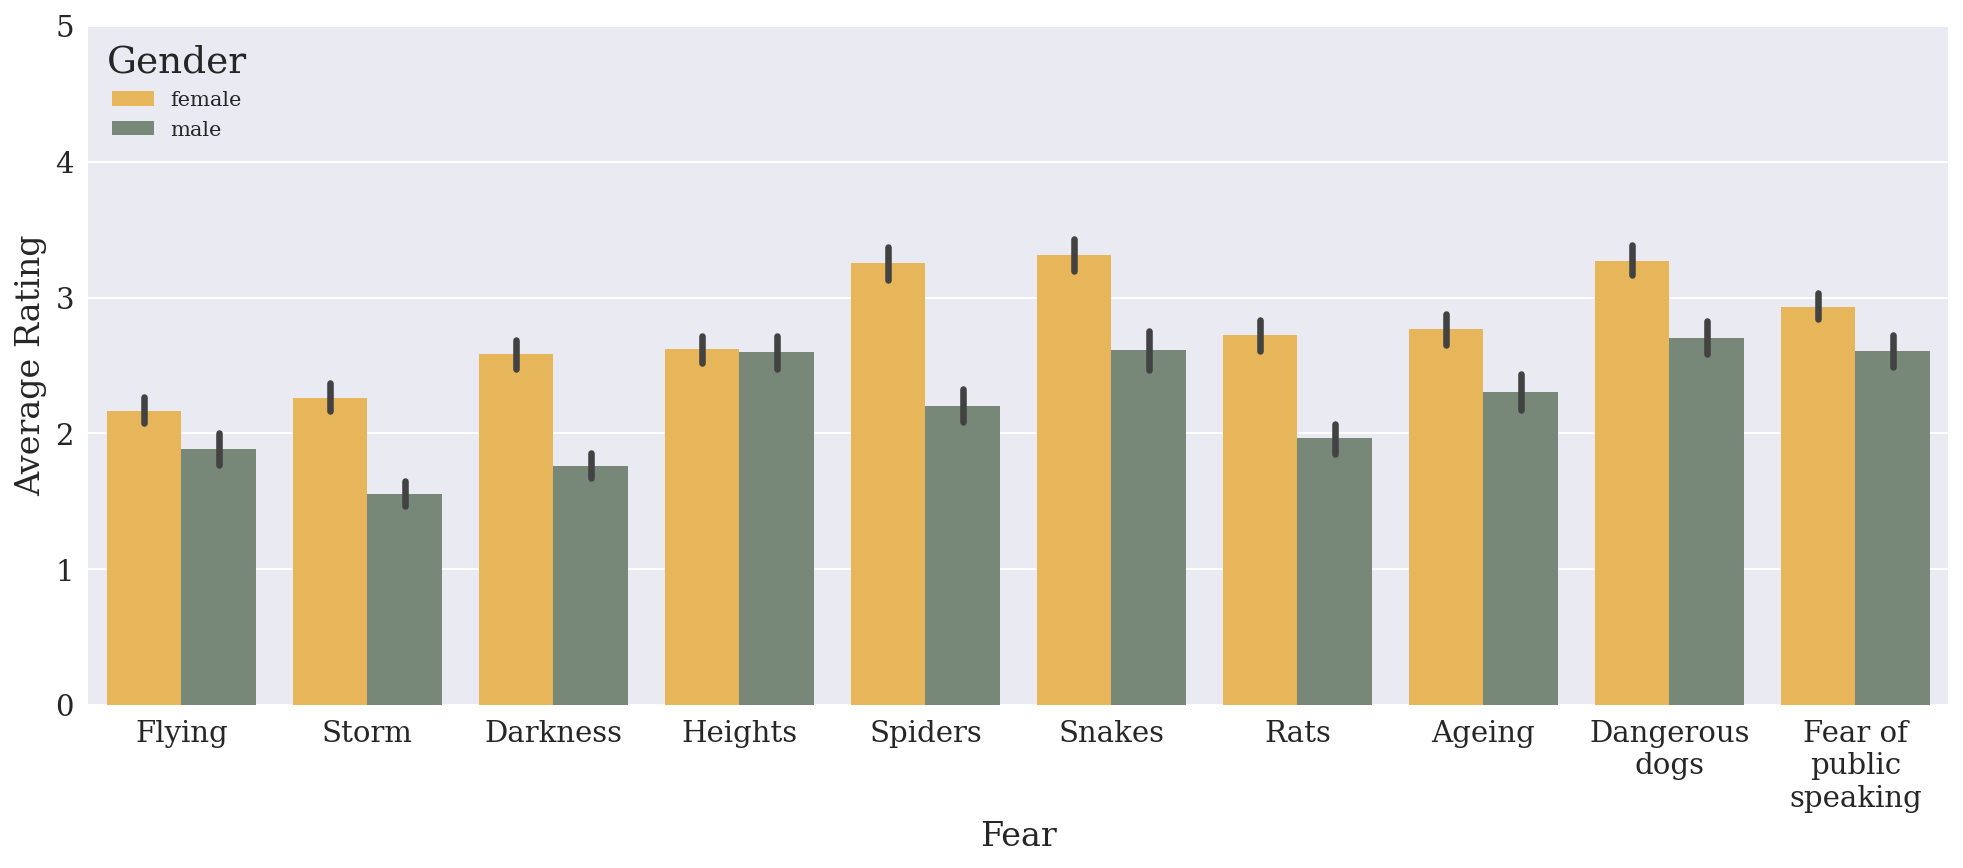

In [72]:
# Barplot for average phobia 'score' per gender
ax = sns.barplot(x="Fear", y="Rating", hue="Gender", data=gender_fears, palette = ['#FFBC42', '#748B75'])

# Some phobia titles are too long, so, I need to wrap the title
# Get the x tick labels
ax.get_xticklabels()

# Get the text out
texts = [t.get_text()  for t in ax.get_xticklabels()]

# Wrap the text
texts = [textwrap.fill(t.get_text(), 12)  for t in ax.get_xticklabels()]

# Set the new wrapped titles
ax.set_xticklabels([textwrap.fill(t.get_text(), 12)  for t in ax.get_xticklabels()])

# Set y-axis limits
ax.set_ylim([0,5])

# Set y-axis label
ax.set_ylabel("Average Rating")

# Legend position
plt.legend(loc='upper left', title='Gender')

# Show the plot
plt.show()

From the bar plot, we can conclude that female students reported higher scores (meaning they are more afraid) than male students in all categories except `Heights`, which is what I was expecting. However, the plot alone is not a good enough proof of the relationshop between gender and fear. So, I wil use indepenet t-tests between the gender scores for each category. The null and alternative hypotheses for the tests are as follows:<br>
- **Null Hypothesis:** µ<sub>m</sub> = µ<sub>f</sub> (the means of both samples are equal)<br>
- **Alternate Hypothesis:** µ<sub>m</sub> ≠ µ<sub>f</sub> (the means of both samples are not equal)

In [121]:
# For each fear, conduct a t-test
for fear in fears:
    male = gender_fears[(gender_fears.Gender == "male") & (gender_fears.Fear == fear)].Rating
    female = gender_fears[(gender_fears.Gender == "female") & (gender_fears.Fear == fear)].Rating

    res = stats.ttest_ind(male, female)
    print(f"{fear:25}:::  {res}")

Flying                   :::  Ttest_indResult(statistic=-3.719502277905965, pvalue=0.00021072941803859882)
Storm                    :::  Ttest_indResult(statistic=-9.833836449125068, pvalue=7.569806195179333e-22)
Darkness                 :::  Ttest_indResult(statistic=-10.784560088483468, pvalue=9.942556697540271e-26)
Heights                  :::  Ttest_indResult(statistic=-0.2511018011422572, pvalue=0.8017870415124309)
Spiders                  :::  Ttest_indResult(statistic=-11.198488034926452, pvalue=1.6778563452493444e-27)
Snakes                   :::  Ttest_indResult(statistic=-7.461705699664963, pvalue=1.849723682414273e-13)
Rats                     :::  Ttest_indResult(statistic=-8.720619445235513, pvalue=1.1381417384529246e-17)
Ageing                   :::  Ttest_indResult(statistic=-5.249317510215222, pvalue=1.863911203189382e-07)
Dangerous dogs           :::  Ttest_indResult(statistic=-6.589510715714403, pvalue=7.12227061580846e-11)
Fear of public speaking  :::  Ttest_indResul

All the p-values except the one from the t-test on `Heights` is tiny (< 0.05), so, there is enough evidence to reject the Null Hypothesis for all categories except `Heights`. That can mean, that there is a relationship between fear and gender.

In [129]:
# Mean score for 'Heights' category
df.groupby("Gender").Heights.mean()

Gender
female    2.619932
male      2.599022
Name: Heights, dtype: float64

As for the fear of `Heights`, both male and female students have rated it similarly. The average score for is approximately the same for both genders (around 2.6). 

In [142]:
# Fears ranked for female students
df[df.Gender == 'female'][fears].mean().sort_values(ascending=False)

Snakes                     3.315346
Dangerous dogs             3.270270
Spiders                    3.254237
Fear of public speaking    2.934233
Ageing                     2.765203
Rats                       2.721284
Heights                    2.619932
Darkness                   2.584459
Storm                      2.258446
Flying                     2.168919
dtype: float64

In [143]:
# Fears ranked for male students
df[df.Gender == 'male'][fears].mean().sort_values(ascending=False)

Dangerous dogs             2.703163
Snakes                     2.615572
Fear of public speaking    2.604878
Heights                    2.599022
Ageing                     2.304136
Spiders                    2.205379
Rats                       1.963325
Flying                     1.882641
Darkness                   1.760976
Storm                      1.557178
dtype: float64

Other than that, we can see that the top 3 things that women fear are all living creatures: `Snakes`, `Dangerous dogs`, and `Spiders`. Men also fear `Dangerous dogs` and `Snakes` the most. That is interesting. 

## Q2: Is There Any Difference Between the Hobbies and Interests of Right-Handed and Left-Handed People?

Next, I will try to see if there is any relationshop between the interests and hobbies, and handedness of a student. I personally think that left-handed students should be more interested in arts and social sciences. Again I say so based on my experience. Now, let's see if this is true. First, I need to separate all the columns that are responsible for the interests and hobbies ratings.

In [212]:
# Get the column names that represent interests or hobbies
interests = df.loc[:, "History":"Pets"].columns.tolist()
interests

['History',
 'Psychology',
 'Politics',
 'Mathematics',
 'Physics',
 'Internet',
 'PC',
 'Economy Management',
 'Biology',
 'Chemistry',
 'Reading',
 'Geography',
 'Foreign languages',
 'Medicine',
 'Law',
 'Cars',
 'Art exhibitions',
 'Religion',
 'Countryside, outdoors',
 'Dancing',
 'Musical instruments',
 'Writing',
 'Passive sport',
 'Active sport',
 'Gardening',
 'Celebrities',
 'Shopping',
 'Science and technology',
 'Theatre',
 'Fun with friends',
 'Adrenaline sports',
 'Pets']

As we can see there's a bunch of them. I'll try to see if there is any relationship between each of these hobbies and the fact that a person is right-handed or left-handed. I first want to calculate the mean scores and see in which categories are right-handed or left-handed students more interested.

In [213]:
# DataFrame with interests and average ratings for right-handed and left-handed students
interests_df = df.groupby("Left - right handed")[interests].mean().T

In [214]:
# Observe the head of the dataframe
interests_df.head()

Left - right handed,left handed,right handed
History,3.346535,3.192478
Psychology,2.960396,3.159822
Politics,2.762376,2.577901
Mathematics,2.440000,2.324115
Physics,2.386139,2.031008


The dataframe looks fine. We can proceed.

In [215]:
# Left-handed people are more interested in this categories
print(interests_df[interests_df["left handed"] > interests_df["right handed"]].index.tolist())

['History', 'Politics', 'Mathematics', 'Physics', 'PC', 'Biology', 'Chemistry', 'Geography', 'Cars', 'Religion', 'Musical instruments', 'Writing', 'Active sport', 'Gardening', 'Science and technology', 'Pets']


In [216]:
# Right-handed people are more interested in this categories
print(interests_df[interests_df["left handed"] < interests_df["right handed"]].index.tolist())

['Psychology', 'Internet', 'Economy Management', 'Reading', 'Foreign languages', 'Medicine', 'Law', 'Art exhibitions', 'Countryside, outdoors', 'Dancing', 'Passive sport', 'Celebrities', 'Shopping', 'Theatre', 'Fun with friends', 'Adrenaline sports']


Rather interesting. As we can see, the average rating given by left-handed students is higher in `Mathematics`, `Biology`, `Chemistry`, `Science and technology`, and theses does not seem to be arts or social sciences. However, left-handed people seem to be more interested in `History`, `Politics`, and `Musical instruments`. In terms of the right-handed students, the categories they are more interested than  the left-handed students is rather diverse, including `Psychology`, `Art exhibitions`, `Celebrities`, `Theathre` and so on. Nonetheless, the difference can be slightly between the two groups' average rating. So this lists cannot be very reliable.

I'll try to visualize the average ratings per interest or hobby for each of the groups to see if there is a significant difference in the ratings. First, I melt the originial dataframe and create a new one where I store the variables I will need for visualization: `Left - right handed`, `Interest`, and `Rating`.

In [217]:
# Make a new df with handedness, interest or hobby type, and rating
handedness_interests = df.melt(id_vars ="Left - right handed", value_vars=interests, var_name="Interest", value_name="Rating")

In [218]:
# Check the head of the dataframe
handedness_interests.head()

,Left - right handed,Interest,Rating
0,right handed,History,1.0
1,right handed,History,1.0
2,right handed,History,1.0
3,right handed,History,4.0
4,right handed,History,3.0


In [219]:
# Check the tail of the dataframe
handedness_interests.tail()

,Left - right handed,Interest,Rating
32315,right handed,Pets,4.0
32316,left handed,Pets,5.0
32317,right handed,Pets,5.0
32318,right handed,Pets,4.0
32319,right handed,Pets,5.0


In [225]:
# Check null values
handedness_interests.isnull().sum()

Left - right handed     96
Interest                 0
Rating                 156
dtype: int64

The dataframe looks fine, but there are some null values. I don't think I would be able to correctly fill the missing data, so, I will just drop the null values (the number of missing values is small enough).

In [240]:
# Drop null values
handedness_interests.dropna(how='any', inplace=True)

Since there are a lot of interests, I will divide them into groups of 8 to be able to better visualize them.

In [242]:
# Make subgroups of size 8 to plot each 8 on a new graph
interest_groups = [interests[pos:pos+8] for pos in range(0, len(interests), 8)]

Next comes visualization, I will be plotting bar graphs again.

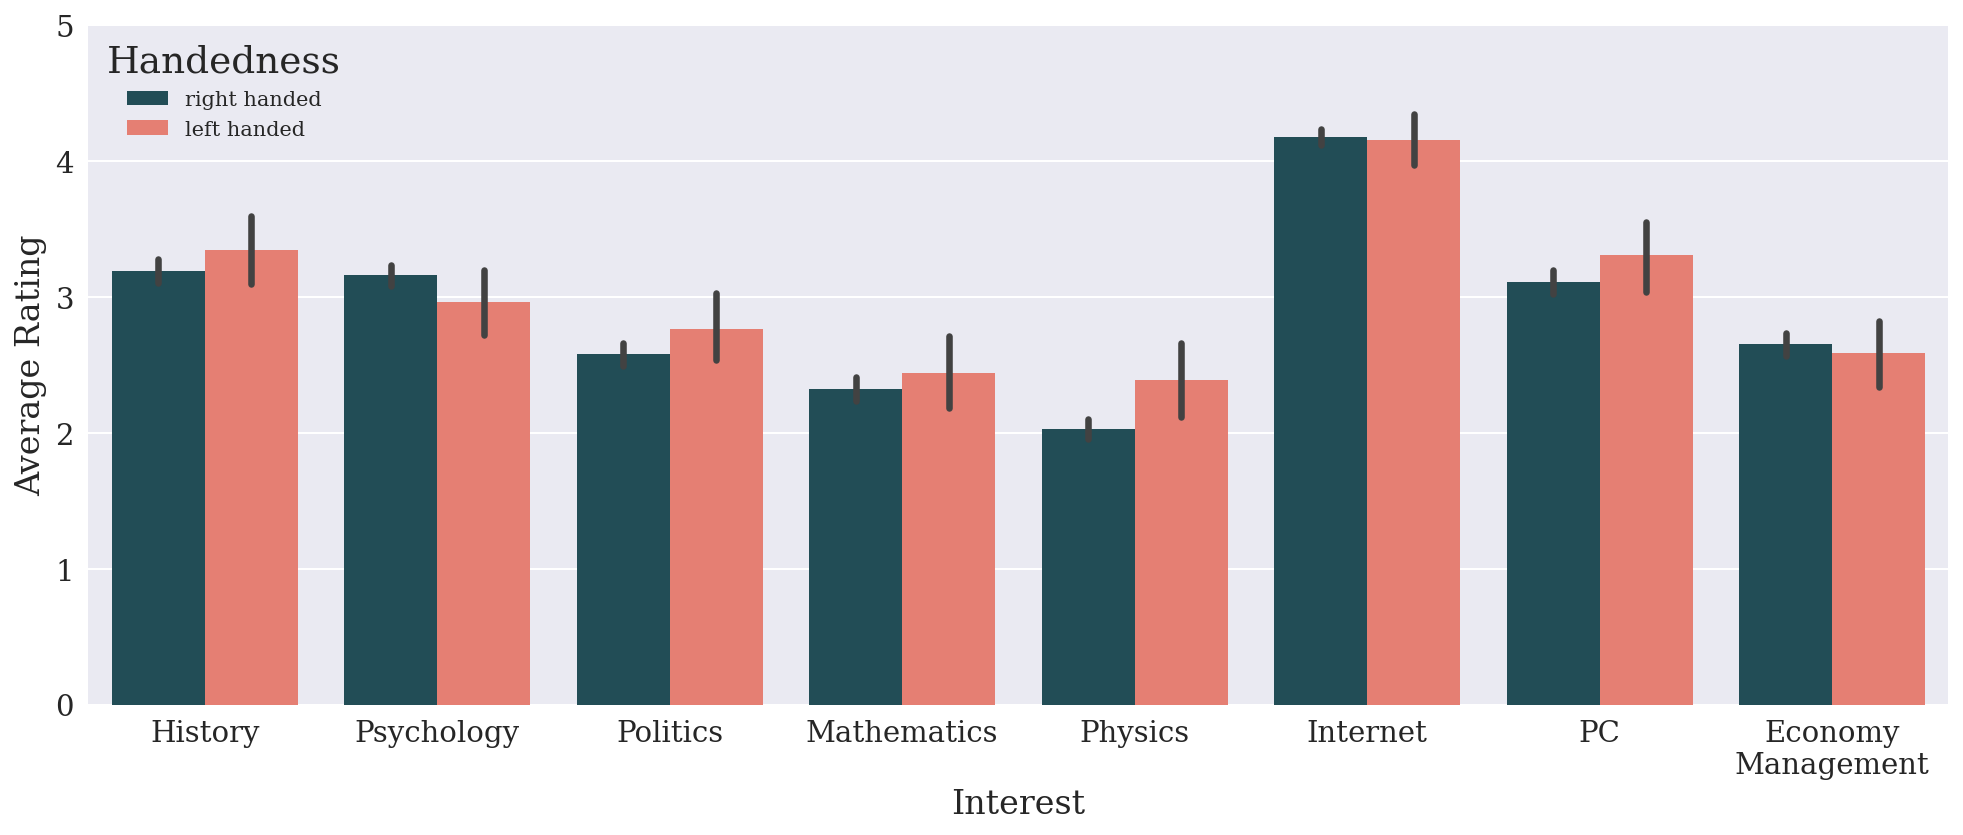

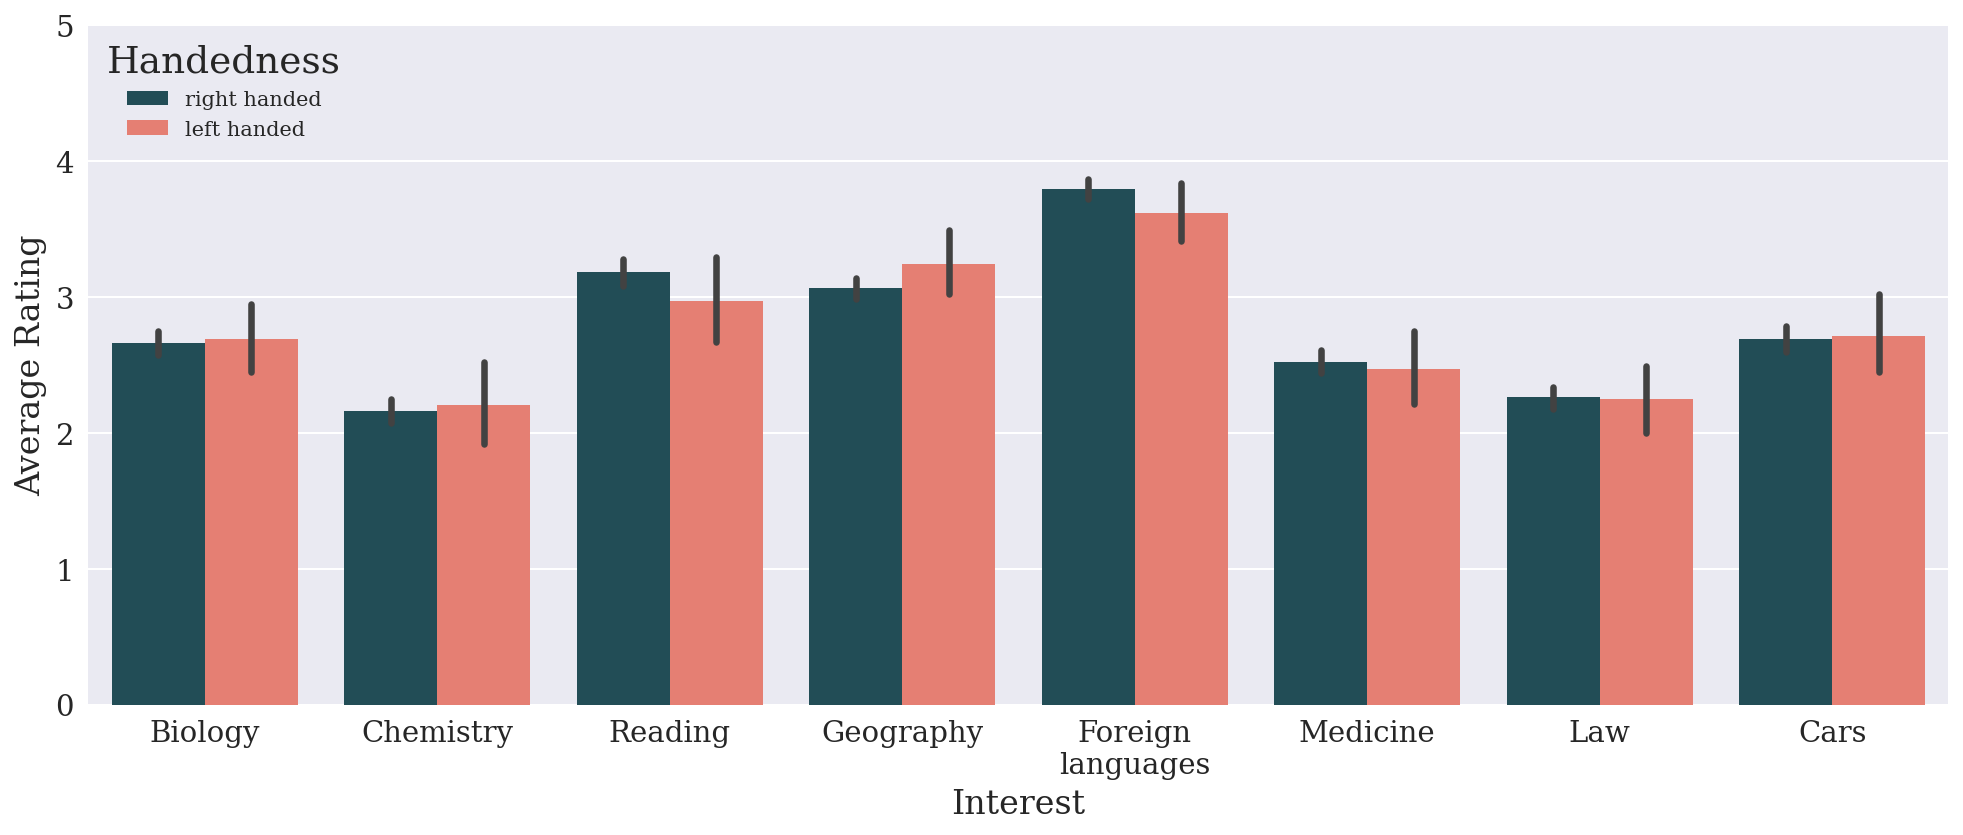

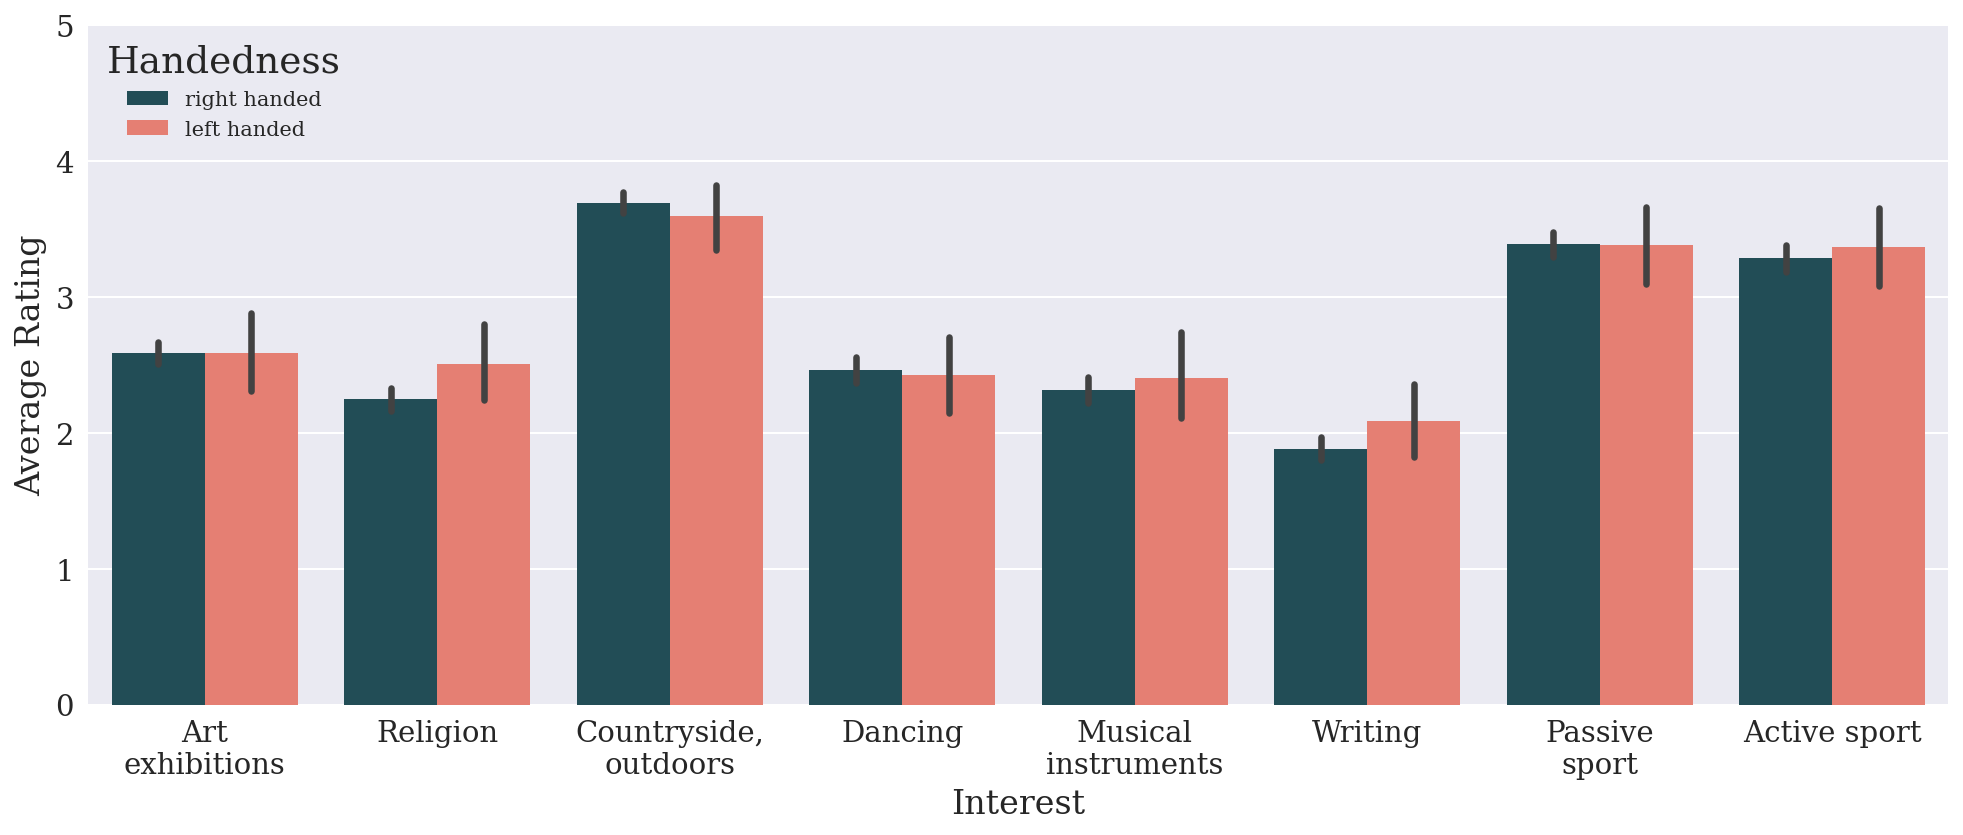

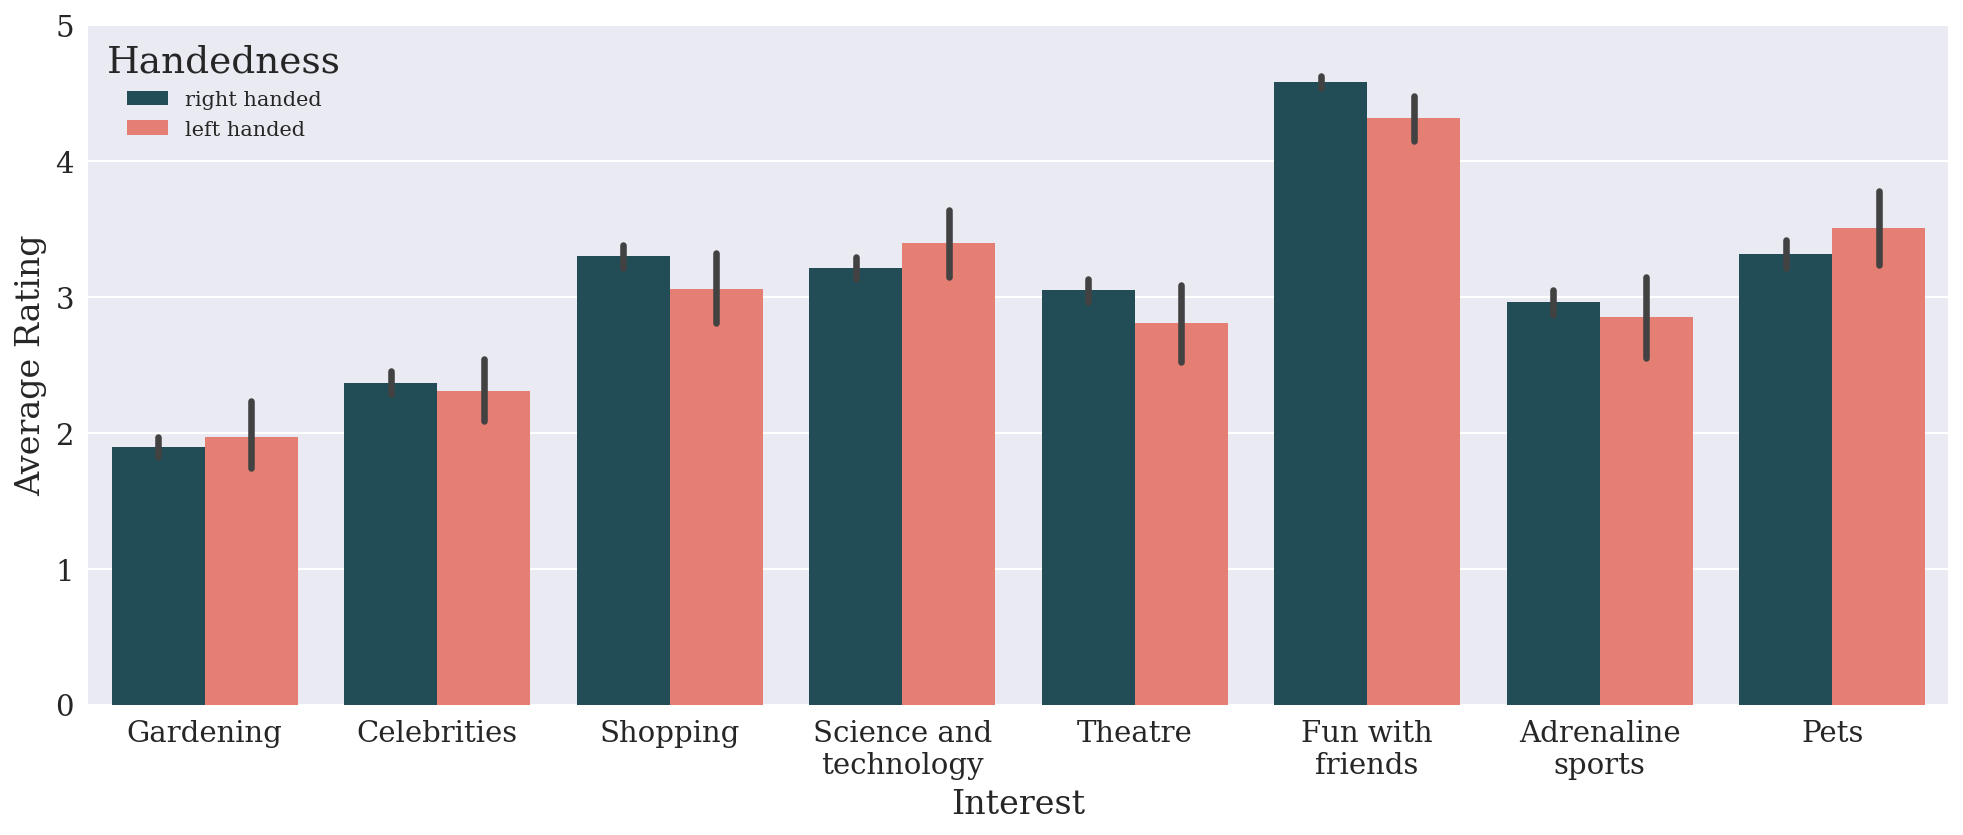

In [330]:
# For every column (interest) in the interest group
for cols in interest_groups:
    # Barplot for average interest or hobby rating for right-handed and left-handed students
    ax = sns.barplot(x="Interest", y="Rating", hue="Left - right handed", data=handedness_interests[handedness_interests["Interest"].isin(cols)], palette = ['#19535F', '#F87060'])

    # Wrap the titles that are long
    # Get the x tick labels
    ax.get_xticklabels()

    # Get the text out
    texts = [t.get_text()  for t in ax.get_xticklabels()]

    # Wrap the text
    texts = [textwrap.fill(t.get_text(), 12)  for t in ax.get_xticklabels()]

    # Set the new wrapped titles
    ax.set_xticklabels([textwrap.fill(t.get_text(), 12)  for t in ax.get_xticklabels()])

    # Add a title
    ax.set_ylabel("Average Rating")

    # Set y-axis limits
    ax.set_ylim([0,5])

    # Legend position
    plt.legend(loc='upper left', title='Handedness')
    
    # Show the plot
    plt.show()
    
    # Close the plot
    plt.close()

I don't see much difference between the average ratings of the two groups in any of the interests. There greatest differences appear to be in categories `Physics` and `Fun with friends`, however the differences are not that large. I believe conducting t-tests for each interest category would help understand the distribution better. The null and alternative hypotheses for the tests are again as follows:<br>
- **Null Hypothesis:** µ<sub>m</sub> = µ<sub>f</sub> (the means of both samples are equal)<br>
- **Alternate Hypothesis:** µ<sub>m</sub> ≠ µ<sub>f</sub> (the means of both samples are not equal)

In [244]:
# Lists to keep the interests and respective p-values
small_p_values = []
large_p_values = []

# For each interest, conduct a t-test
for interest in interests:
    right = handedness_interests[(handedness_interests["Left - right handed"] == "right handed") & (handedness_interests.Interest == interest)].Rating
    left = handedness_interests[(handedness_interests["Left - right handed"] == "left handed") & (handedness_interests.Interest == interest)].Rating

    res = stats.ttest_ind(right, left)
    
    # Append the interest and p-value to the respective list
    if res.pvalue < 0.05:
        small_p_values.append([interest, res])
    else:
        large_p_values.append([interest, res])


I gathered the results of the t-tests in two different lists: one with small p-values (<0.05) indicating that there is enough evidence to reject the Null Hypothesis and consider that there can be some relationship between the interst and handedness; the other with large p-values (>0.05) meaning that there is not enough evidence to reject the Null Hypothesis and consider that there is any relationship between the two variables.

In [245]:
# Enough evidence to reject the Null Hypothesis
for interest, res in small_p_values:
    print(f"{interest:25} ::: {res}")

Physics                   ::: Ttest_indResult(statistic=-2.765407684301169, pvalue=0.005789614136660286)
Fun with friends          ::: Ttest_indResult(statistic=3.4883579330685706, pvalue=0.0005071371982415619)


In [246]:
# Not enough evidence to reject the Null Hypothesis
for interest, res in large_p_values:
    print(f"{interest:25} ::: {res}")

History                   ::: Ttest_indResult(statistic=-1.161381482073855, pvalue=0.24576310557143116)
Psychology                ::: Ttest_indResult(statistic=1.5106194812164386, pvalue=0.1312013367586734)
Politics                  ::: Ttest_indResult(statistic=-1.3589422708670742, pvalue=0.17447007431007577)
Mathematics               ::: Ttest_indResult(statistic=-0.8121985414989703, pvalue=0.41687062787510387)
Internet                  ::: Ttest_indResult(statistic=0.1960469765088635, pvalue=0.844613188288819)
PC                        ::: Ttest_indResult(statistic=-1.3963142070955623, pvalue=0.16293006674884075)
Economy Management        ::: Ttest_indResult(statistic=0.4758092865702288, pvalue=0.6343141773956098)
Biology                   ::: Ttest_indResult(statistic=-0.20458708452455807, pvalue=0.8379364200920281)
Chemistry                 ::: Ttest_indResult(statistic=-0.3028975944178078, pvalue=0.7620312177700408)
Reading                   ::: Ttest_indResult(statistic=1.331437

As we can see, the t-test results show that there can be a relationshop between how interested a person is in `Physics` or having `Fun with friends` and the handedness of the person. In terms of all the other interest categories, there is not enough evidence to think that the means between the groups are significantly different.

## Q3: Are men or women more concerned about their health (alcohol consumption, smoking, healthy eating)?

Another interesting question is about whether men or women are more concerned about their health. I tend to believe women are consuming much less alcohol and smoking less than men. In terms of the healthy eating habits, I don't have any idea. I'll try to visualize alcohol consumption, smoking and healthy eating habits for both genders, and see if there is a significant difference.

First, I make a new dataframe and store in it the normalized distribution of alcohol consumption habits for both genders.

In [33]:
# Normalized distribution of highest education received by gender
gender_alcohol = pd.DataFrame(df.groupby(["Gender"]).Alcohol.value_counts(normalize=True)*100)

# Rename the column
gender_alcohol.columns = ['Percent']

# Reset index
gender_alcohol.reset_index(inplace=True)

# Print the result
gender_alcohol

,Gender,Alcohol,Percent
0,female,social drinker,70.847458
1,female,drink a lot,17.627119
2,female,never,11.525424
3,male,social drinker,57.946210
4,male,drink a lot,28.606357
5,male,never,13.447433


The dataframe looks fine. Time to make a plot. I will be making a barplot again, since it is a good way of showing differences between groups.

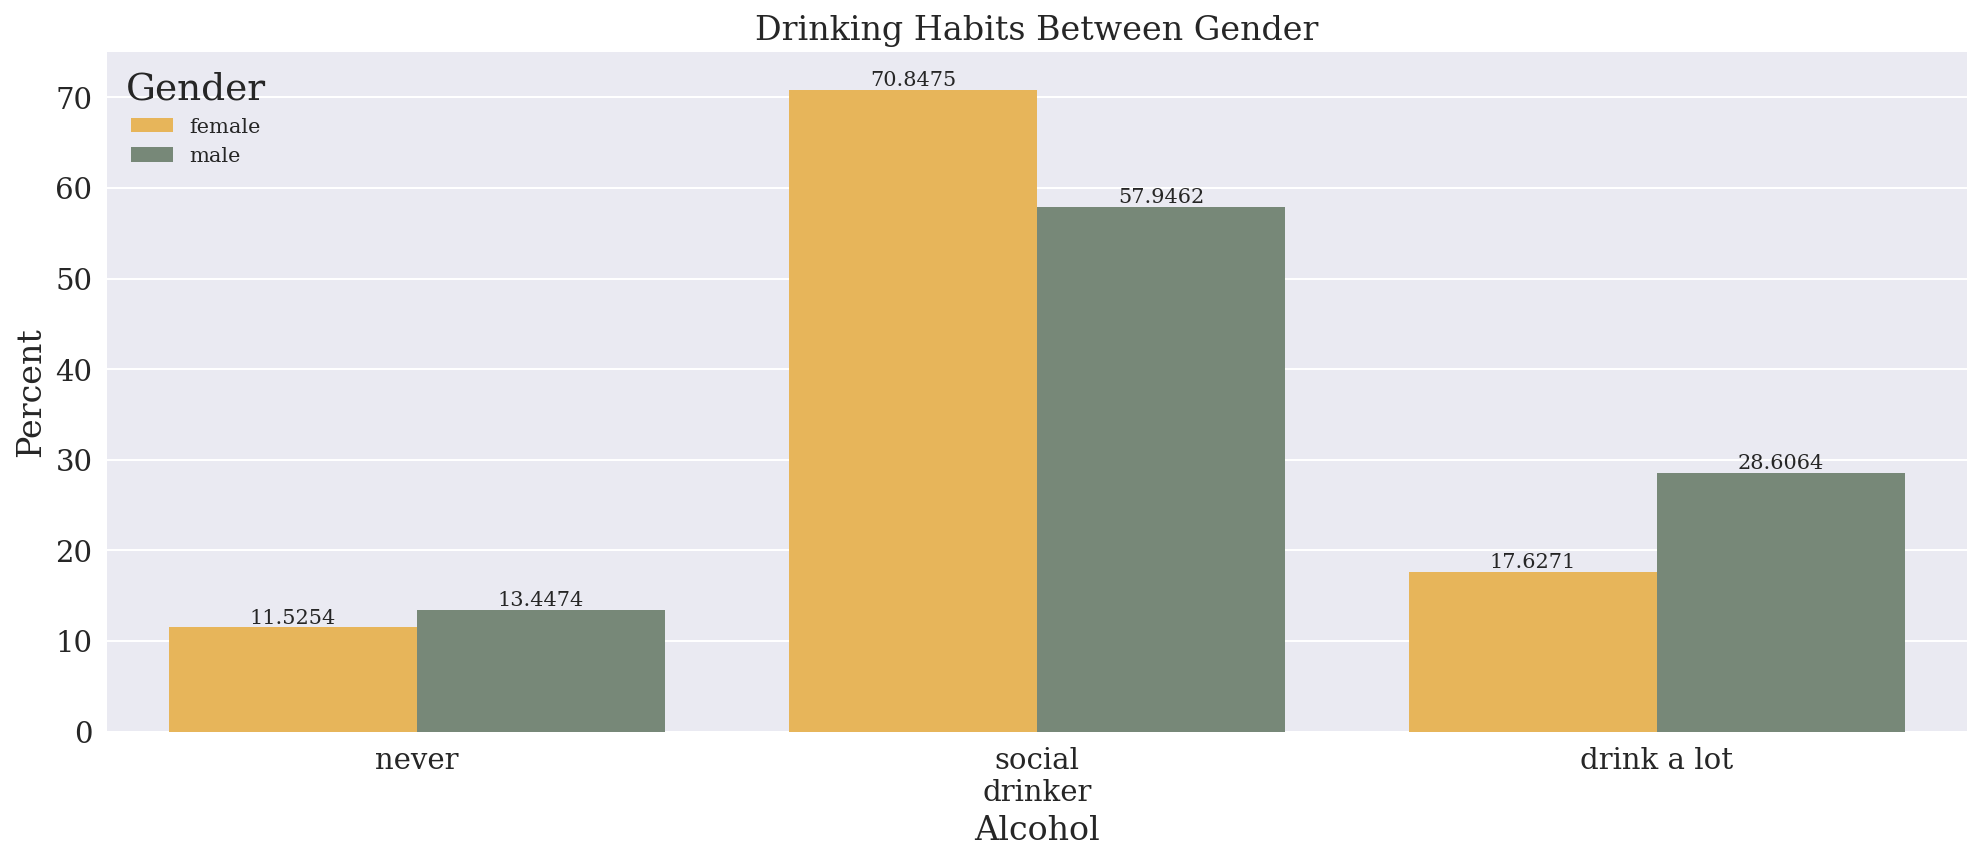

In [248]:
# Barplot for drinking habits betwenn genders
ax = sns.barplot(x="Alcohol", y="Percent", hue="Gender", data=gender_alcohol, order=['never', 'social drinker', 'drink a lot'], palette = ['#FFBC42', '#748B75'])

# Wrap the x-axis titles
# Get the x tick labels
ax.get_xticklabels()

# Get the text out
texts = [t.get_text()  for t in ax.get_xticklabels()]

# Wrap the text
texts = [textwrap.fill(t.get_text(), 12)  for t in ax.get_xticklabels()]

# Set the new wrapped titles
ax.set_xticklabels([textwrap.fill(t.get_text(), 12)  for t in ax.get_xticklabels()])

# Set y-axis limits
ax.set_ylim([0, 75])

# Add bar labels
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)

# Add a title
plt.title("Drinking Habits Between Genders")

# Legend position
plt.legend(loc='upper left', title='Gender')

# Show the plot
plt.show()

While we can see that the percent of men and women that have never drunk is close, there is a big difference in the other two groups. The bar chart clearly shows that men drink much more than women. However, I'll also conduct a chi-squared test (since the variables are categorical) to verify that. The null and alternative hypotheses for the test are as follows:<br>
- **Null Hypothesis:** The grouping variables have no association or correlation amongst them.<br>
- **Alternate Hypothesis:** The variables are associated with each other and happen to have a correlation between the variables.

In [370]:
# Chi-squared
chisqt = pd.crosstab(df.Gender, df.Alcohol, margins=True)
print(chisqt)

Alcohol  drink a lot  never  social drinker  All
Gender                                          
female           104     68             418  590
male             117     55             237  409
All              221    123             655  999


In [371]:
value = np.array([chisqt.iloc[0][0:3].values,
                  chisqt.iloc[1][0:3].values])

stat, p, dof, expected = chi2_contingency(value)

print(p)

4.4974256864364367e-05


The p-value is much less than 0.05, so we reject the Null hypothesis and assume that the variables `Gender` and `Alcohol` habits are associated and ther happens to be some correlation between them. This supports my expectiation. Now, I'll do the same for the `Smoking` habits between the genders.

I make another new dataframe and store in it the normalized distribution of smoking habits for both genders.

In [35]:
# Normalized distribution of highest education received by gender
gender_smoking = pd.DataFrame(df.groupby(["Gender"]).Smoking.value_counts(normalize=True)*100)

# Rename the column
gender_smoking.columns = ['Percent']

# Reset index
gender_smoking.reset_index(inplace=True)

# Print the result
gender_smoking

,Gender,Smoking,Percent
0,female,tried smoking,41.765705
1,female,never smoked,20.882852
2,female,current smoker,18.845501
3,female,former smoker,18.505942
4,male,tried smoking,44.226044
5,male,never smoked,20.638821
6,male,current smoker,19.164619
7,male,former smoker,15.970516


The dataframe looks fine. Now, I will plot a barplot again.

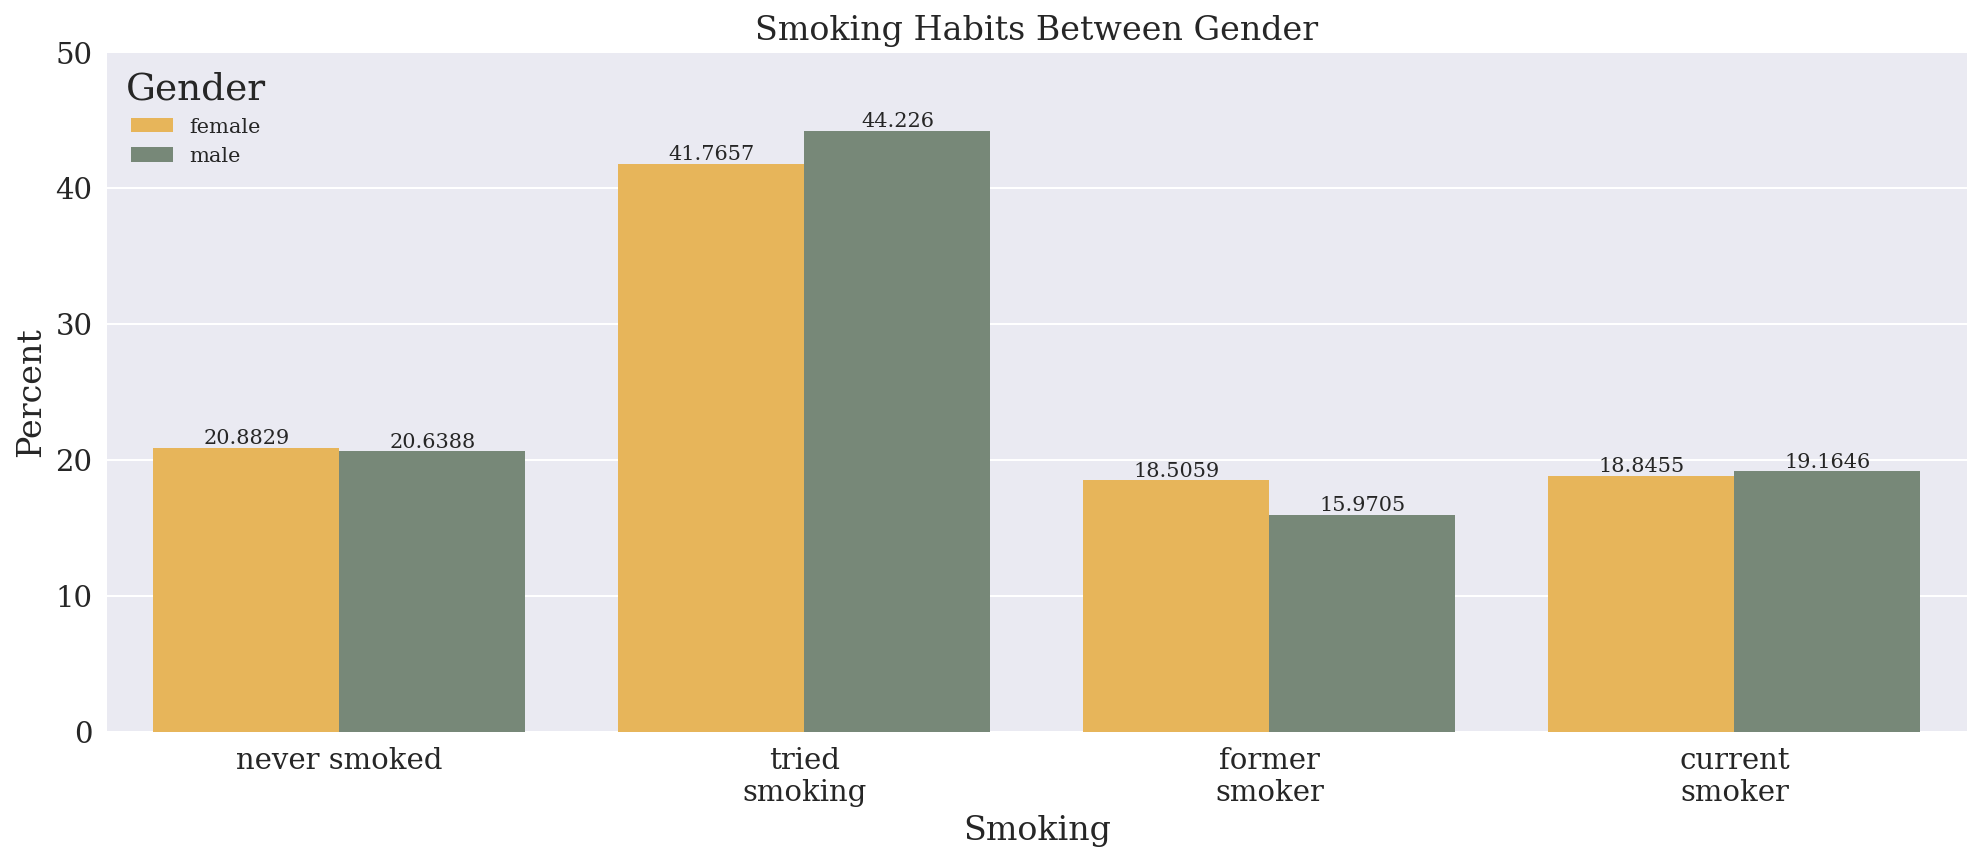

In [263]:
# Barplot for smoking habits between genders
ax = sns.barplot(x="Smoking", y="Percent", hue="Gender", data=gender_smoking, order=['never smoked', 'tried smoking', 'former smoker', 'current smoker'], palette = ['#FFBC42', '#748B75'])

# Wrap the x-axis titles
# Get the x tick labels
ax.get_xticklabels()

# Get the text out
texts = [t.get_text()  for t in ax.get_xticklabels()]

# Wrap the text
texts = [textwrap.fill(t.get_text(), 12)  for t in ax.get_xticklabels()]

# Set the new wrapped titles
ax.set_xticklabels([textwrap.fill(t.get_text(), 12)  for t in ax.get_xticklabels()])

# Set y-axis limits
ax.set_ylim([0, 50])

# Add bar labels
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)

# Add a title
plt.title("Smoking Habits Between Genders")

# Legend position
plt.legend(loc='upper left', title='Gender')

# Show the plot
plt.show()

Surprisingly to me, there is not as much difference between the smoking habits of men and women. However, conducting a chi-squared test will help us understand if the variables are correlated or not. The null and alternative hypotheses for the test are again as follows:<br>
- **Null Hypothesis:** The grouping variables have no association or correlation amongst them.<br>
- **Alternate Hypothesis:** The variables are associated with each other and happen to have a correlation between the variables.

In [368]:
# Chi-squared
chisqt = pd.crosstab(df.Gender, df.Smoking, margins=True)
print(chisqt)

Smoking  current smoker  former smoker  never smoked  tried smoking  All
Gender                                                                  
female              111            109           123            246  589
male                 78             65            84            180  407
All                 189            174           207            426  996


In [369]:
value = np.array([chisqt.iloc[0][0:4].values,
                  chisqt.iloc[1][0:4].values])

stat, p, dof, expected = chi2_contingency(value)

print(p)

0.7419702557454063


This time, the p-value is greater than 0.5, thus, we accept the Null hypothesis and assume that the variables `Gender` and `Smoking` habits are independent of each other. This differs from my expectation.

Last but not least, I'll try to see if there is a realtionship between `Gender` and `Healthy eating` habits. Since `Healthy eating` is a numeric cariable, I'll just plot the mean values for both genders and see if they differ much.

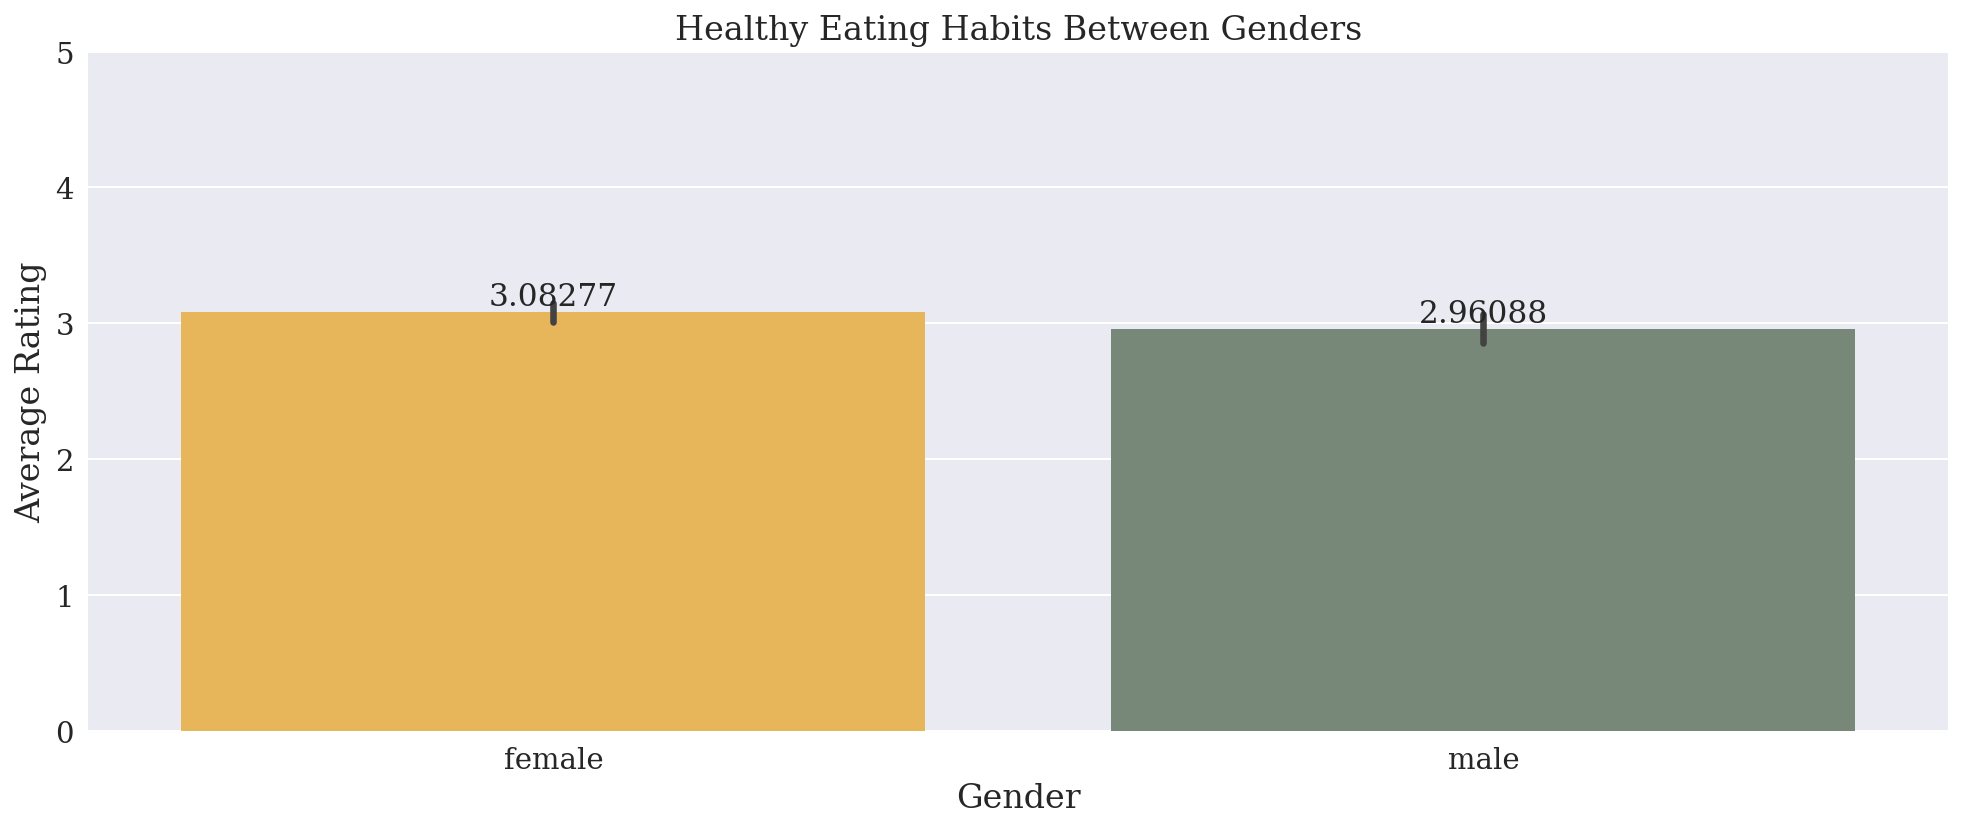

In [390]:
# Barplot for healthy eating habits between genders
ax = sns.barplot(x="Gender", y="Healthy eating", data=df, palette = ['#FFBC42', '#748B75'])

# Wrap the x-axis titles
# Get the x tick labels
ax.get_xticklabels()

# Get the text out
texts = [t.get_text()  for t in ax.get_xticklabels()]

# Wrap the text
texts = [textwrap.fill(t.get_text(), 12)  for t in ax.get_xticklabels()]

# Set the new wrapped titles
ax.set_xticklabels([textwrap.fill(t.get_text(), 12)  for t in ax.get_xticklabels()])

# Set y-axis limits
ax.set_ylim([0, 5])

# Set y-axis label
ax.set_ylabel("Average Rating")

# Add bar labels
ax.bar_label(ax.containers[0], fontsize=15)

# Add a title
plt.title("Healthy Eating Habits Between Genders")

# Show the plot
plt.show()

There is no significant difference and I conclude that the variables are independent. Yet, conducting a t-test will give a solid answer. As before, the null and alternative hypotheses for the tests are as follows:<br>
- **Null Hypothesis:** µ<sub>m</sub> = µ<sub>f</sub> (the means of both samples are equal)<br>
- **Alternate Hypothesis:** µ<sub>m</sub> ≠ µ<sub>f</sub> (the means of both samples are not equal)

In [320]:
# T-test
male = df[df.Gender == "male"].dropna()["Healthy eating"]
female = df[df.Gender == "female"].dropna()["Healthy eating"]

res = stats.ttest_ind(male, female)
print(f"{'Healthy eating':25}:::  {res}")

Healthy eating           :::  Ttest_indResult(statistic=-2.8345519136461426, pvalue=0.0047268302806371225)


However, the p-value is much less than 0.05, which means we reject the Null hypothesis and accept that there is a relationship between the two variables. I plotted the kde plots of both groups to see the distribution of ratings.

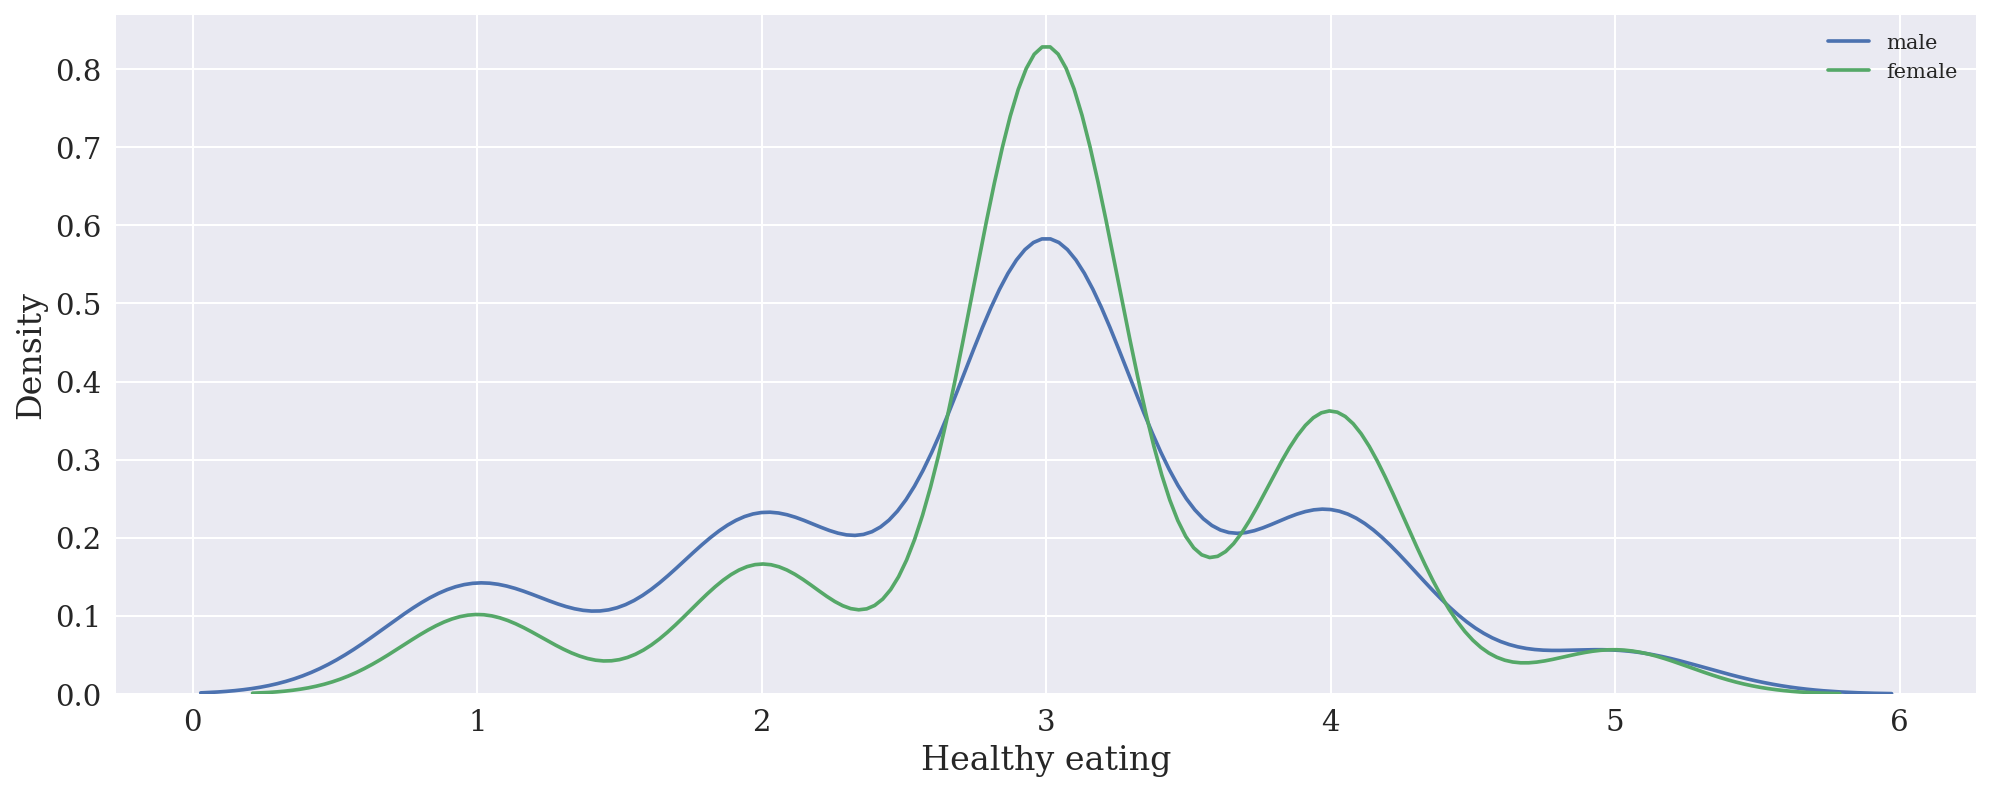

In [321]:
# Distributions
sns.kdeplot(male)
sns.kdeplot(female)
plt.legend(labels=['male', 'female'])

Overall, we can conclude that men women pay attention to their health somewhat more than men: women drink less and are more concerned with healthy eating habits.

## Q4: More men or women get higher education?

As for me, education is important and can help a person to have a successful career. That's why I got interested to see whether more men or women get higher education. Nowadays, I think there won't be much difference between the percent of men and women getting higher education. I'll make a bar chart to visually show that. First, I make a new dataframe with the information I'll need for visualization: `Gender`, `Education`, and `Percent` (of men or women whose highest education achieved is that).

In [331]:
# Normalized distribution of highest education received by gender
gender_education = pd.DataFrame(df.groupby("Gender").Education.value_counts(normalize=True)*100)

# Rename the column
gender_education.columns = ['Percent']

# Reset index
gender_education.reset_index(inplace=True)

# Print the result
gender_education

,Gender,Education,Percent
0,female,secondary school,61.655405
1,female,college/bachelor degree,20.777027
2,female,primary school,9.121622
3,female,masters degree,7.432432
4,female,currently a primary school pupil,1.013514
5,male,secondary school,61.557178
6,male,college/bachelor degree,21.654501
7,male,masters degree,8.759124
8,male,primary school,5.839416
9,male,doctorate degree,1.216545


Now, I visualize the distribution of highest education achieved by gender.

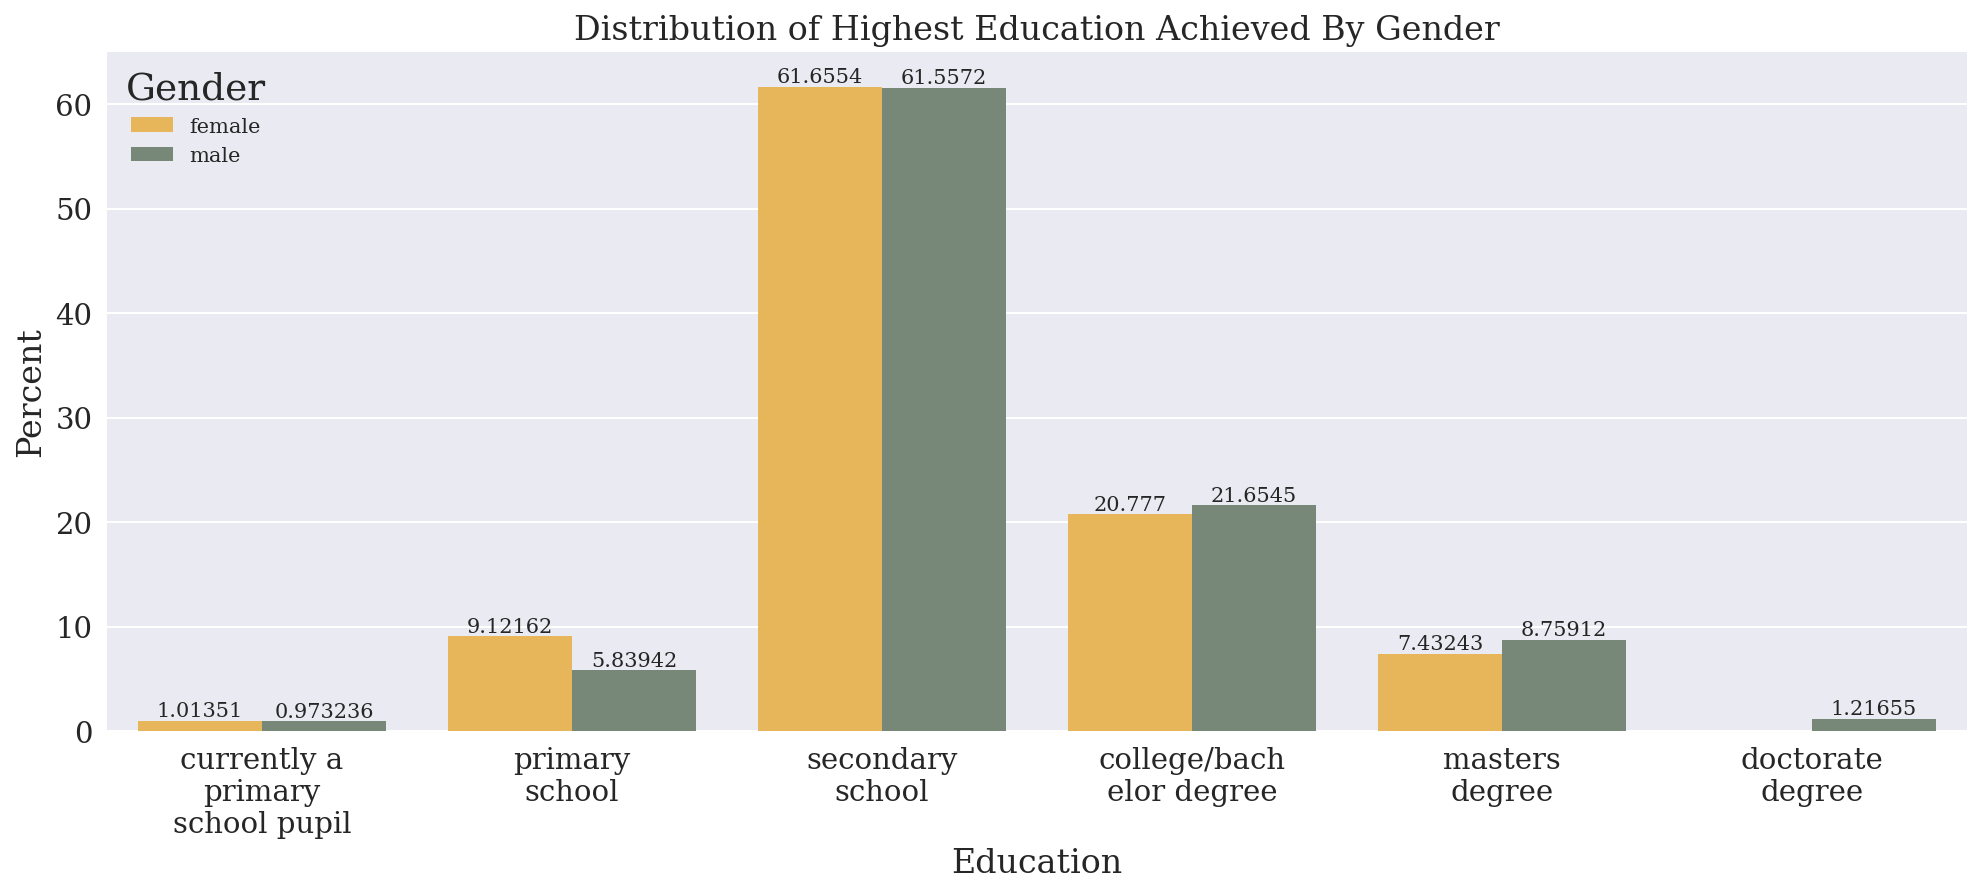

In [332]:
# Barplot for education distribution by gender
ax = sns.barplot(x="Education", y="Percent", hue="Gender", data=gender_education, order=['currently a primary school pupil', 'primary school', 'secondary school', 'college/bachelor degree', 'masters degree', 'doctorate degree'], palette = ['#FFBC42', '#748B75'])

# Wrap the x-axis titles
# Get the x tick labels
ax.get_xticklabels()

# Get the text out
texts = [t.get_text()  for t in ax.get_xticklabels()]

# Wrap the text
texts = [textwrap.fill(t.get_text(), 12)  for t in ax.get_xticklabels()]

# Set the new wrapped titles
ax.set_xticklabels([textwrap.fill(t.get_text(), 12)  for t in ax.get_xticklabels()])

# Set y-axis limits
ax.set_ylim([0, 65])

ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)

plt.title("Distribution of Highest Education Achieved By Gender")

# Legend position
plt.legend(loc='upper left', title='Gender')

# Show the plot
plt.show()

As can be seen from the bar plot, slightly more men than women get a bachelor degree or higher. I will conduct a chi-squared test (since variables are categorical) to see if there really is any correlation betwen `Gender` and highest `Education` achieved. The null and alternative hypotheses for the test are as follows:<br>
- **Null Hypothesis:** The grouping variables have no association or correlation amongst them.<br>
- **Alternate Hypothesis:** The variables are associated with each other and happen to have a correlation between the variables.

In [362]:
# Chi-squared
chisqt = pd.crosstab(df.Gender, df.Education, margins=True)
print(chisqt)

Education  college/bachelor degree  currently a primary school pupil  \
Gender                                                                 
female                         123                                 6   
male                            89                                 4   
All                            212                                10   

Education  doctorate degree  masters degree  primary school  secondary school  \
Gender                                                                          
female                    0              44              54               365   
male                      5              36              24               253   
All                       5              80              78               618   

Education   All  
Gender           
female      592  
male        411  
All        1003  


In [363]:
value = np.array([chisqt.iloc[0][0:6].values,
                  chisqt.iloc[1][0:6].values])

stat, p, dof, expected = chi2_contingency(value)

print(p)

0.04773224450754823


As the p-value is slightly less than 0.05, we reject the Null hypothesis and assume that the  variables `Gender` and highest `Education` received are associated and that there is some correlation between them. This is a bit different than what I have expected.

## Q5: Do more people from villages (who spent most of their childhood in a village) or cities have siblings (or are not the only child)?

I have heard many times that in villages, families tend to have more kids. This might also be correlated with poverty, or maybe the fact that life in a village is not as expensive as in a city. Anyway, I'll try to make a plot to visually see if this opinion is true or not, and will conduct a chi-squared test to verify the answer. To do so, I first need a new dataframe with variables `Village - town`, `Only child`, and percentage of those that are the only child.

In [339]:
# Normalized distribution of highest education received by gender
city_only_child = pd.DataFrame(df.groupby(["Village - town"])["Only child"].value_counts(normalize=True)*100)

# Rename the column
city_only_child.columns = ['Percent']

# Reset index
city_only_child.reset_index(inplace=True)

# Change 'Only child' labels
city_only_child['Only child'] = city_only_child['Only child'].map({'yes':'only child', 'no':'not only child'})

# Print the result
city_only_child

,Village - town,Only child,Percent
0,city,not only child,73.617021
1,city,only child,26.382979
2,village,not only child,77.591973
3,village,only child,22.408027


The dataframe seems to be fine. Time for visualization. Again, I'll use a bar chart.

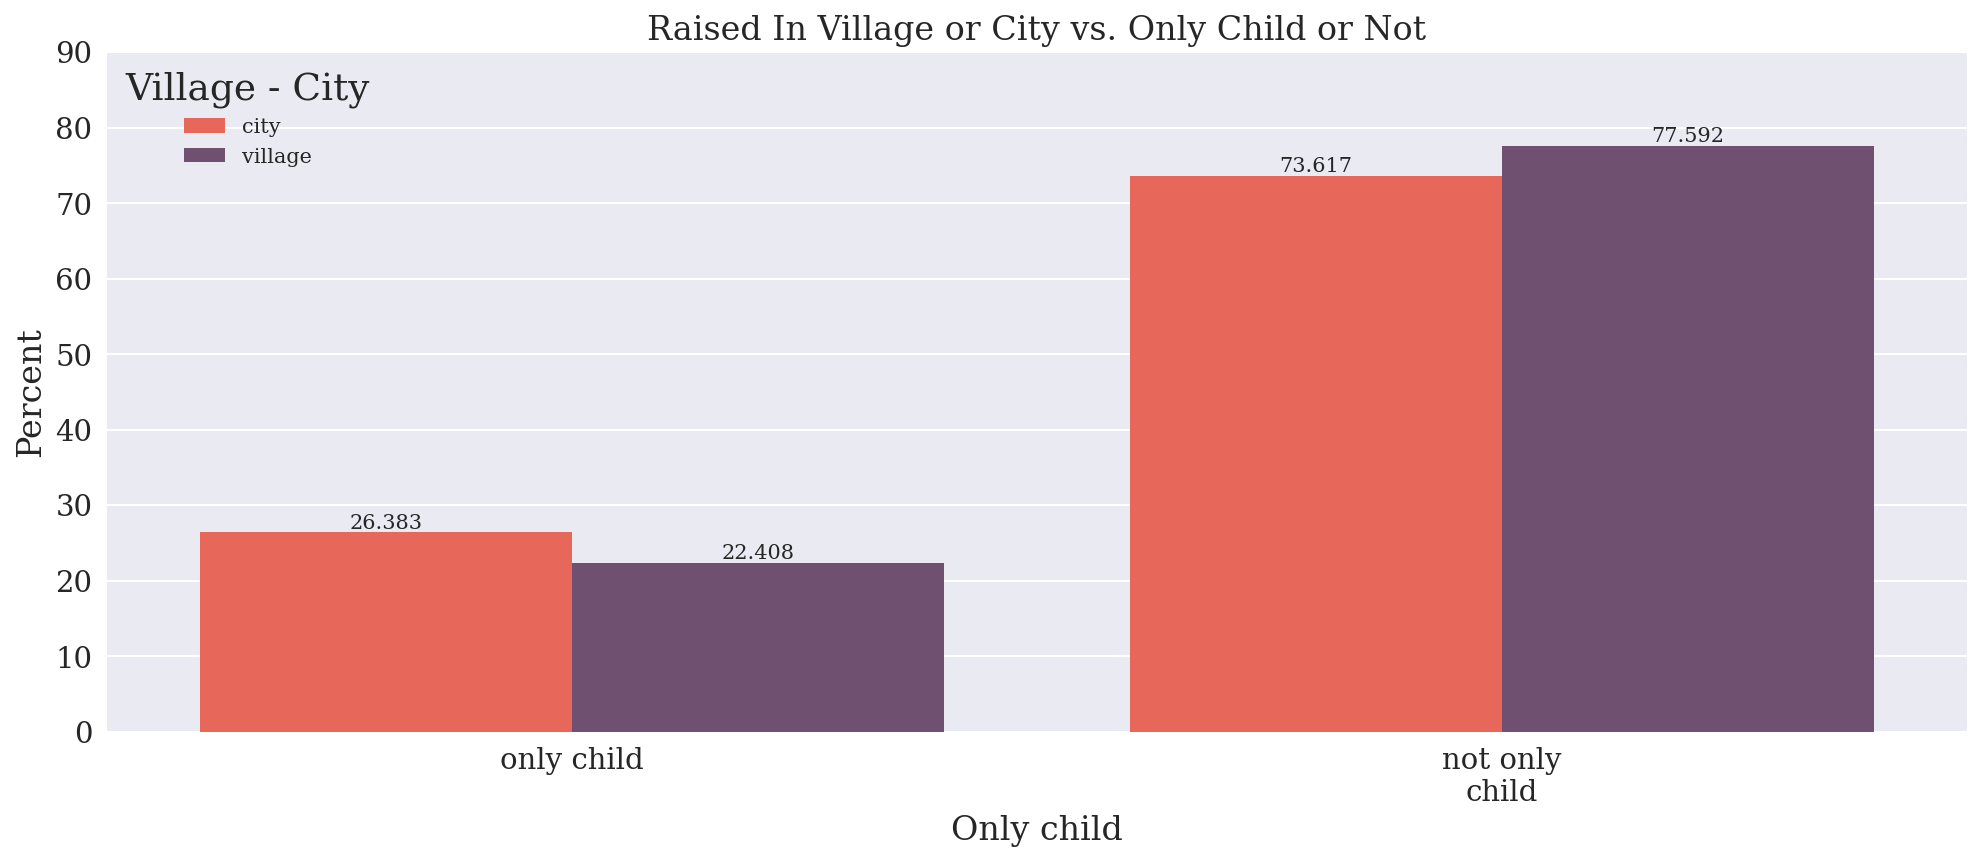

In [341]:
# Barplot. Raised In Village or City vs. Only Child or Not 
ax = sns.barplot(x="Only child", y="Percent", hue="Village - town", data=city_only_child, order=['only child', 'not only child'], palette = ['#FF5542', '#744B75'])

# Wrap the x-axis titles
# Get the x tick labels
ax.get_xticklabels()

# Get the text out
texts = [t.get_text()  for t in ax.get_xticklabels()]

# Wrap the text
texts = [textwrap.fill(t.get_text(), 12)  for t in ax.get_xticklabels()]

# Set the new wrapped titles
ax.set_xticklabels([textwrap.fill(t.get_text(), 12)  for t in ax.get_xticklabels()])

# Set y-axis limits
ax.set_ylim([0, 90])

ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)

plt.title("Raised In Village or City vs. Only Child or Not")

# Legend position
plt.legend(loc='upper left', title='Village - City')

# Show the plot
plt.show()

The bar chart suggests that more people from villages are not the only child in their family as compared to the poeple from cities. I'll conduct a chi-squared test to see if there really is a correlation between these two variables. Like before, the null and alternative hypotheses for the test are as follows:<br>
- **Null Hypothesis:** The grouping variables have no association or correlation amongst them.<br>
- **Alternate Hypothesis:** The variables are associated with each other and happen to have a correlation between the variables.

In [372]:
# Chi-squared
chisqt = pd.crosstab(df["Village - town"], df["Only child"], margins=True)
print(chisqt)

Only child       no  yes   All
Village - town                
city            519  186   705
village         232   67   299
All             751  253  1004


In [373]:
value = np.array([chisqt.iloc[0][0:2].values,
                  chisqt.iloc[1][0:2].values])

stat, p, dof, expected = chi2_contingency(value)

print(p)

0.21234394562124723


Since the p-value is greater than 0.05, we accept the Null hypothesis and assume that the variables raised in `Village - town` and is the `Only child` are independent. This does not line up with the opinion.

## Q6: Gender and God

The last question I have thought about when looking through the dataset is whether there is a relationship between the gender of a person and their belief in god. Since variable `God` is a numeric variable, I'll just calculate the means for each gender group and conduct a t-test. I have no idea whether there will be any association between these variables or no.

In [374]:
df.groupby("Gender").God.mean()

Gender
female    3.467005
male      3.065693
Name: God, dtype: float64

We can see that there is a significant difference between the average rating. The higher the raing the stronger the person agreed to the statement "I believe in God". It looks like there is a relationship between gender and whether a person believes in god. However, I'll conduct a t-test to verify that. Again, the null and alternative hypotheses for the tests are as follows:<br>
- **Null Hypothesis:** µ<sub>m</sub> = µ<sub>f</sub> (the means of both samples are equal)<br>
- **Alternate Hypothesis:** µ<sub>m</sub> ≠ µ<sub>f</sub> (the means of both samples are not equal)

In [382]:
male = df[df.Gender == "male"].God.dropna()
female = df[df.Gender == "female"].God.dropna()

res = stats.ttest_ind(male, female)
print(f"{fear:25}:::  {res}")

Fear of public speaking  :::  Ttest_indResult(statistic=-4.241303769918826, pvalue=2.4283312247322885e-05)


Because the p-value is much smaller than 0.05, we reject the Null hypothesis and assume that the variable `Gender` and belief in `God` are depenedent and that there is a correlation between them.

## Other Correlations

It was also interesting to see which numeric variables were correlated. Since they were similar variables in the data, I expected to see some correlated variables. Below are the 50 most correlated variables. The correlation of almost all of them appears to be quite logical.

In [386]:
c = df.corr().abs().unstack().sort_values(ascending=False)[len(df.columns)-11::2]
c.head(50)

Medicine                Biology                    0.715551
Height                  Weight                     0.697696
Biology                 Chemistry                  0.689859
Fantasy/Fairy tales     Animated                   0.674675
Shopping centres        Shopping                   0.651585
Chemistry               Medicine                   0.626713
Physics                 Mathematics                0.595992
Opera                   Classical music            0.595905
Rats                    Snakes                     0.571605
Metal or Hardrock       Punk                       0.544016
Theatre                 Art exhibitions            0.538653
Rock                    Metal or Hardrock          0.527118
Spending on looks       Shopping                   0.510987
Rock                    Punk                       0.508821
Religion                God                        0.508445
Public speaking         Fear of public speaking    0.506332
Horror                  Thriller        

## Write-up